<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 5. 왜 우리 동네에는 스타벅스가 없을까?

**데이터 수집**

In [ ]:
# 스타벅스 입지 가설
# 1) 거주 인구가 많은 지역에 스타벅스 매장이 많이 입지해 있을 것이다.
# 2) 직장인이 많은 지역에 스타벅스 많은 입지해 있을 것이다.

# 두 가지 가설을 검증하기 위해서 인구통계 데이터 수집도 필요합니다.
# 크롤링을 통해, 스타벅스 홈페이지에서 스타벅스 매장들의 정보를 수집하고,
# 서울시 열린 데이터 광장 Open API를 이용해 인구통계 데이터를 수집해 보겠습니다.

**크롤링을 이용한 서울시 스타벅스 매장 목록 데이터 생성**

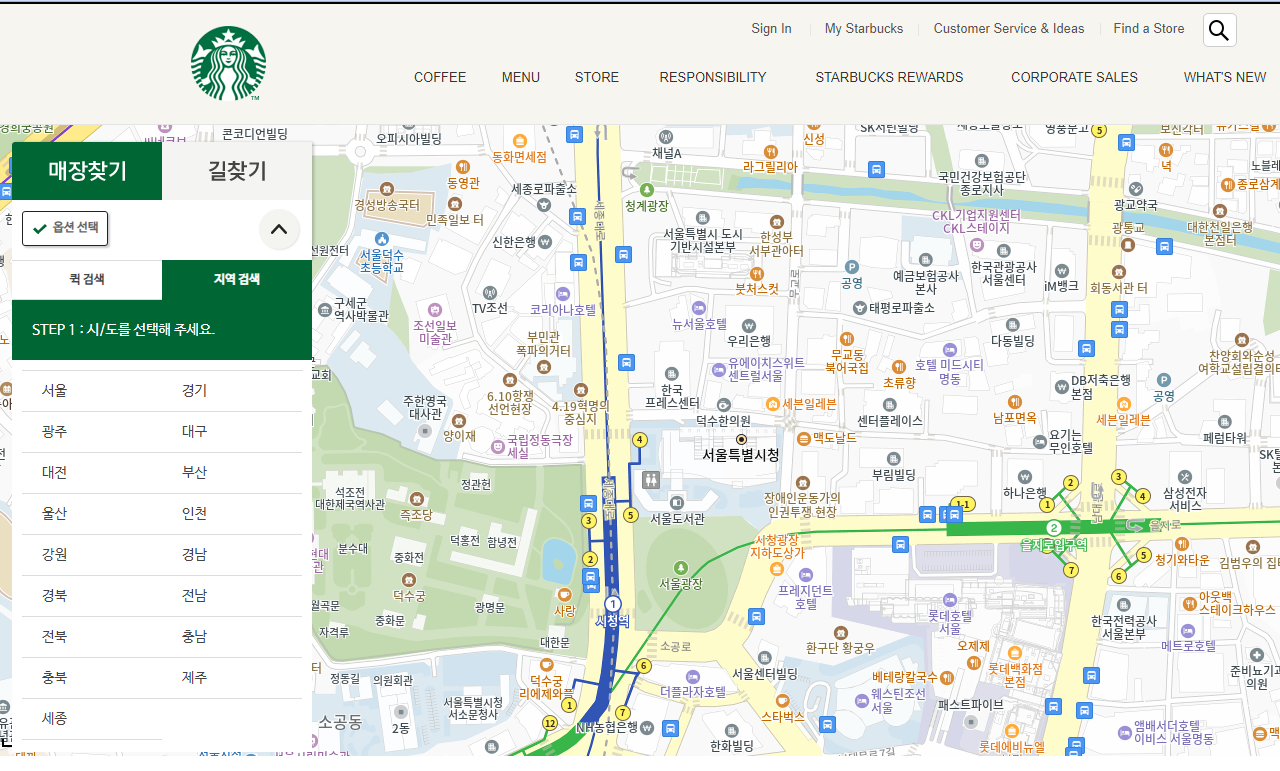

In [ ]:
# 스타벅스 매장 목록: https://www.starbucks.co.kr/index.do
# 페이지에서 왼쪽 메뉴의 [매장찾기]탭 하단의 [지역검색] 탭에서 지역별 매장 목록을 확인할 수 있습니다.

**라이브러리 임포트**

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net

In [ ]:
from selenium import webdriver
# 크롤링을 실행하기 위해 selenium 라이브러리의 web driver를 불러왔습니다.

from bs4 import BeautifulSoup
# 크롤링으로 가져온 HTML에서 정보를 추출하기 위해 "BeautifulSoup" 라이브러리를 추가했습니다.

import pandas as pd

**Selenium 설치 & 내 구글 드라이브에 chromedriver 설치**

In [ ]:
!pip install selenium
!apt-get update

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
!python --version

import selenium
print(selenium.__version__)

Python 3.10.12
4.31.1


**라이브러리 임포트**

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve
from bs4 import BeautifulSoup

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

In [ ]:
pip install chromedriver-autoinstaller
# 참고사이트: https://velog.io/@kite_day/colab-%EC%97%90%EC%84%9C-%EC%9B%B9-%ED%81%AC%EB%A1%A4%EB%A7%81%ED%95%98%EA%B8%B0-selenium

In [ ]:
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

In [ ]:
driver = webdriver.Chrome(options=chrome_options)
# webdriver의 Chrome()함수를 이용해 크롬 브라우저를 실행하고 browser변수에 할당합니다.

In [ ]:
url='https://www.starbucks.co.kr/store/store_map.do?disp=locale'
driver.get(url)
# driver.get(url): 해당 url로 이동.

In [ ]:
driver.implicitly_wait(3) # element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정
print(driver)

<selenium.webdriver.chrome.webdriver.WebDriver (session="db42f00d4d7b33596f925b4e28b10975")>


In [ ]:
# 크롬 브라우저에서 '서울'버튼의 위치를 얻기 위해 개발자 도구를 실행합니다.
# [메뉴]->[도구 더보기]->[개발자 도구]

# 개발자 도구 화면에 버튼의 HTML 요소인 <a> 태그가 선택되어 하이라이트 된 것을 확인할 수 있습니다.
# 하이라이트 표시된 태그 영역에 마우스 커서를 이동한 후, 마우스 오른쪽 버튼을 클릭하면 [선택] 메뉴가 나타나고, [copy] 메뉴에서
# [copy selector]를 클릭하면 전체 HTML 문서 내에서 '서울' 버튼에 해당하는 태그의 구조 정보가 복사됩니다.(CSS selector)

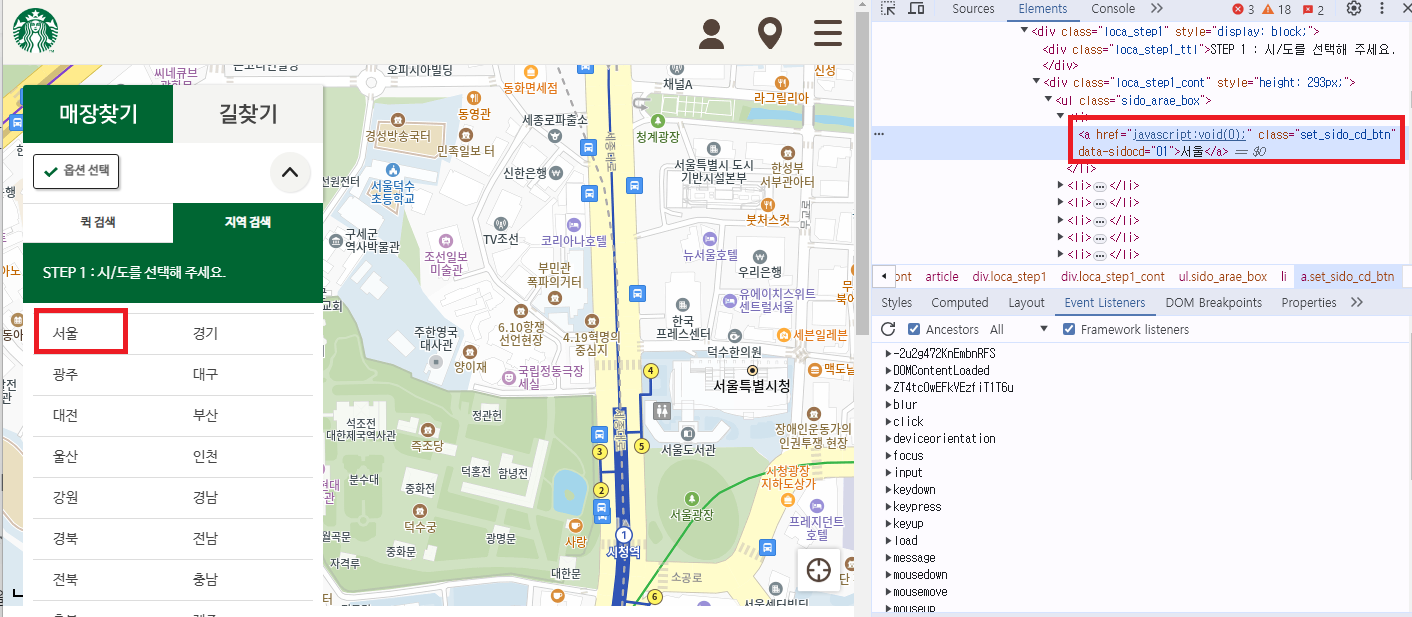

In [ ]:
# webdriver로 '서울' 버튼 요소를 찾아 클릭
# '서울' 클릭
seoul_btn='#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
driver.find_element_by_css_selector(seoul_btn).click()

AttributeError: 'WebDriver' object has no attribute 'find_element_by_css_selector'

In [ ]:
from selenium.webdriver.common.by import By
seoul_btn='#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'

counts=driver.find_element(By.CSS_SELECTOR,seoul_btn)
counts.click() # 웹브라우저에서 특정 요소를 클릭한다.

# driver.find_element(By.CSS_SELECTOR) = seoul_btn에서 저장된 '서울'버튼의 위치를 선택하고, click() 명령으로 해당 버튼 클릭.

**구/군 선택 화면**

In [ ]:
# 전체'버튼'을 클릭해 서울시 전체 매장을 조회합니다.
# '서울' 버튼의 CSS 셀렉터를 복사한 것처럼 '전체' 버튼의 CSS 셀렉터를 복사합니다.

all_btn='#mCSB_2_container > ul > li:nth-child(1) > a'
counts=driver.find_element(By.CSS_SELECTOR,all_btn)
counts.click() # 웹브라우저에서 특정 요소를 클릭한다.

In [ ]:
# beautifulsoup으로 html 파서 만들기
html=driver.page_source
# driver.page_source를 통해 크롬 브라우저의 현재 화면에 나타난 웹페이지의 HTML을 가져올 수 있습니다.

soup=BeautifulSoupu=(html, 'html.parser')
# html.parser는 HTML 문법을 이해하고, 웹 페이지의 정보를 분류하는 역할을 합니다.

In [ ]:
html

'<html lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Starbucks">\n<meta property="og:url" content="https://www.starbucks.co.kr/">\n<meta property="og:image" content="https://image.istarbucks.co.kr/common/img/kakaotalk.png">\n<meta property="og:description" content="Starbucks">\n\n<title id="titleJoin">Starbucks Korea</title><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-WC8Q3C59QP&amp;cx=c&amp;_slc=1"></script><script src="https://connect.facebook.net/ko_KR/sdk.js?hash=43230cbf1d03f7107ae2216a90f016e9" async="" crossorigin="anonymous"></script><script id="facebook-jssdk" src="//connect.facebook.net/ko_KR/sdk.js"></script><script async="" src="//www.google-analytics.c

In [ ]:
soup

('<html lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Starbucks">\n<meta property="og:url" content="https://www.starbucks.co.kr/">\n<meta property="og:image" content="https://image.istarbucks.co.kr/common/img/kakaotalk.png">\n<meta property="og:description" content="Starbucks">\n\n<title id="titleJoin">Starbucks Korea</title><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-WC8Q3C59QP&amp;cx=c&amp;_slc=1"></script><script src="https://connect.facebook.net/ko_KR/sdk.js?hash=43230cbf1d03f7107ae2216a90f016e9" async="" crossorigin="anonymous"></script><script id="facebook-jssdk" src="//connect.facebook.net/ko_KR/sdk.js"></script><script async="" src="//www.google-analytics.

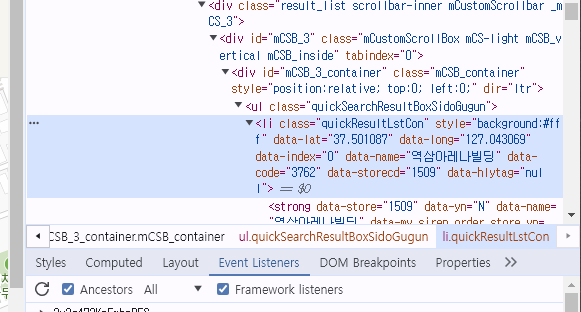

In [ ]:
# 매장 리스트에서 첫 번째 '역삼역 아레나 빌딩'에 해당하는 태그 확인
# 스타벅스 매장 목록에서 개별 매장 정보(지점명, 주소 등)는 각각 다르지만, HTML 상에서 동일한 구조의 태그로 표시된다는 사실을 알 수 있다.
# HTML에서 <li>태그: 여러 항목을 리스트(목록)로 화면에 나타낼 때 사용하는 태그.

In [ ]:
# select()를 이용해 원하는 HTML 태그를 모두 찾아오기
soup=BeautifulSoup(html, 'html.parser')

starbucks_soup_list=soup.select('li.quickResultLstCon')
# soup안에서 태그명이 li이면서 class명이 quickResultLstCon인 태그를 모두 찾아 리스트 형태로 저장합니다.

print(len(starbucks_soup_list))

615


In [ ]:
# 태그 문자열 살펴보기
starbucks_soup_list[0]

# 아래를 보면 태그 li값이면서, class명이 quickResultLstCon값을 도출했음을 알 수 있다.

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [ ]:
# <strong> 태그: '역삼아레나빌딩'이라는 텍스트와 이미지를 표시하는 <img>태그 포함
# <p> 태그 사이에는 주소와 전화번호가 표시돼 있습니다.
# <i>: class의 속성값으로 pin_general을 가지고 있습니다. 이 아이콘은 스타벅스 매장 타입에 따라 클래스명이 다르게 표시되고, 아이콘 이미지도 달라집니다.
# 이 값을 통해, 스타벅스 매장 타입을 분류할 수 있습니다.